In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from data import *
from features import *
from stats import *
from preprocess import *
from step import Step
import tempfile
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

In [41]:
step = Step(load_msng)
# step = Step(load_mnm_spatial)
# step = Step(load_mnm_feature)
step = Step(gt_n_trials, step, n=8)
# step = Step(subset, step, key='monkey', value='ADR')
step = Step(win_cts_by_trial, step, win_start=1500, win_end=6000, win_size=500, win_stride=500)
step = Step(win_cts_by_win, step)
step = Step(stat_tests, step, opposite=True)
step = Step(sig_stat, step, stat='anova_p', alpha=1e-2)
# step = Step(select, step)
# tvt = Step(tvt_split, sel, num_splits=10, num_val=1, num_test=1)
# samp = Step(gen_samples, tvt, num_train=50, num_val=1, num_test=1)

In [43]:
stats = step()['stats_by_cell_win']

In [49]:
stats[stats.anova_p < 1e-5]

,,t_p,min_t_p,min_t_p_pos,anova_p,kruskal_p
cell,win,,,,,
KEN-PFC-46-20,8,"[999, 0.5304882395934163, 0.9687481771301241, ...",0.004042,10,1.641427e-06,1.098656e-05
KEN-PFC-46-530,7,"[0.6296470685355061, 0.2193361647100156, 0.932...",0.003313,11,1.995523e-06,4.740816e-05
KEN-PFC-46-539,8,"[0.626700750459552, 999, 999, 0.53843587827925...",0.107875,13,5.787102e-08,1.122360e-07
KEN-PFC-46-57,7,"[0.7212582482661472, 0.5497448302557175, 1.0, ...",0.068277,12,6.821938e-11,1.130313e-08
KEN-PFC-46-60,6,"[0.020723032774809767, 999, 0.2769957159753494...",0.000042,10,3.184197e-06,1.540997e-05
...,...,...,...,...,...,...
LEM-PPC-PPC-882,7,"[999, 0.0766375821616509, 999, 999, 0.57365396...",0.008826,7,1.188922e-12,9.030345e-10
LEM-PPC-PPC-887,7,"[999, 0.7987776837370704, 999, 999, 0.14474339...",0.144743,4,2.496370e-08,1.759657e-07
LEM-PPC-PPC-888,7,"[0.1768796480794003, 0.6685700062935436, 999, ...",0.176880,0,5.357432e-18,1.107415e-12


In [45]:
stats[stats.anova_p < 1e-2].min_t_p_pos.value_counts()

min_t_p_pos
2     62
4     48
10    43
8     43
3     42
1     36
9     34
14    32
7     29
11    24
0     24
12    23
5     23
15    21
6     21
13    20
Name: count, dtype: int64

<Axes: title={'center': 'win_cts'}, xlabel='position'>

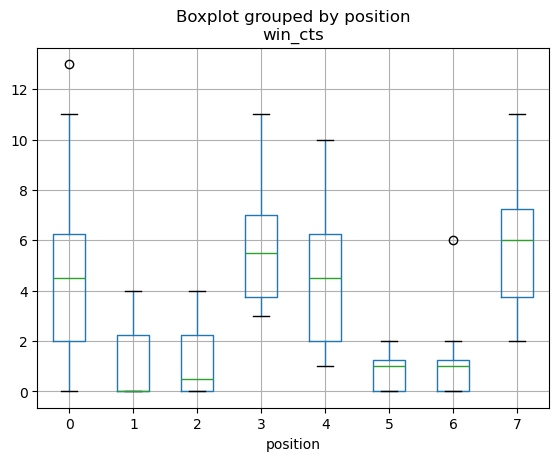

In [50]:
wcbw_step()['win_cts'].loc['ADR-PFC-PD-POST-1914', :, :, 7].boxplot(by='position', column='win_cts')

In [13]:
df = wcbw_step()['win_cts'].loc['ELV-PFC-PV-POST-2346', :, :, 7]
df

ismatch win_cts
position trial                 
0        0            0    25.0
         1            1    15.0
         2            0    19.0
         3            1    14.0
         4            0    16.0
...                 ...     ...
7        7            1    25.0
         8            1    17.0
         9            1    11.0
         10           0     5.0
         11           0    15.0

[96 rows x 2 columns]

In [14]:
df.index.get_level_values('position')

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype='int64', name='position')

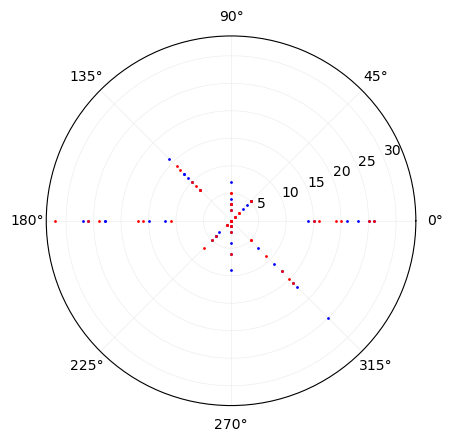

In [15]:
# polar scatter plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.scatter(df[df.ismatch == 1].index.get_level_values('position') * np.pi / 4, df[df.ismatch == 1].win_cts, zorder=3, s=1, c='b')
plt.scatter(df[df.ismatch == 0].index.get_level_values('position') * np.pi / 4, df[df.ismatch == 0].win_cts, zorder=3, s=1, c='r')
plt.grid(color='#eee', linestyle='-', linewidth=0.5)

<Axes: title={'center': 'win_cts'}, xlabel='position'>

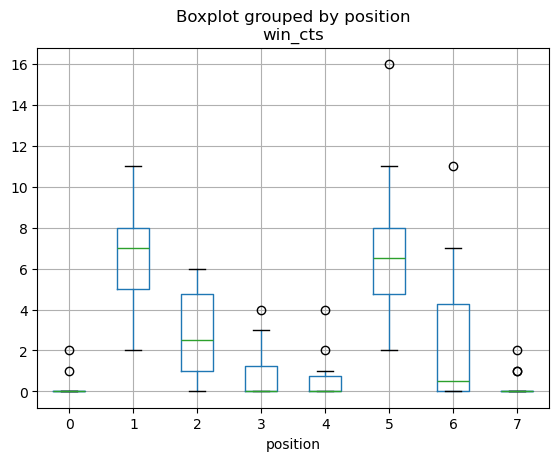

In [16]:
wcbw_step()['win_cts'].loc['ELV-PFC-MD-POST-2599', :, :, 7].boxplot(by='position', column='win_cts')

<Axes: title={'center': 'win_cts'}, xlabel='position'>

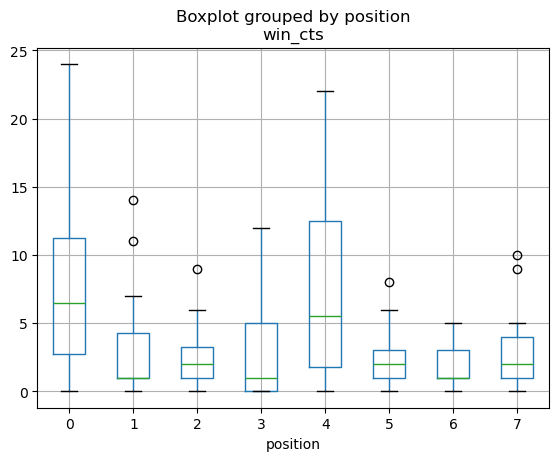

In [17]:
wcbw_step()['win_cts'].loc['BEN-PFC-MD-PRE-501', :, :, 7].boxplot(by='position', column='win_cts')

In [32]:
# for cell, win in stats[stats.anova_p < 1e-16].index:
#     wcbw_step()['win_cts'].loc[cell, :, :, win].boxplot(by='position', column='win_cts')

In [33]:
# for cell, win in stats[stats.min_t_p < 1e-14].index:
#     wcbw_step()['win_cts'].loc[cell, :, :, win].boxplot(by='position', column='win_cts')

In [31]:
stats[stats.min_t_p < 1e-14]

t_p  \
cell                 win                                                      
ADR-PFC-PD-PRE-1093  0    [0.0940178877155462, 0.3813401038558516, 0.737...   
BEN-PFC-MD-PRE-501   0    [4.005173671907311e-33, 0.048669890543056336, ...   
                     1    [1.4260642142780658e-15, 0.029581946488873072,...   
ELV-PFC-MD-POST-2015 2    [0.8662520828773135, 0.14902737371867036, 0.32...   
ELV-PFC-MD-POST-2177 6    [0.6016343053502227, 0.24337600602760565, 0.05...   
ELV-PFC-MD-POST-2259 2    [2.150123064389673e-15, 0.030594308961393996, ...   
ELV-PFC-MD-POST-2431 3    [0.34666567282294025, 0.17736458249406087, 0.2...   
ELV-PFC-MD-POST-2432 0    [0.10452627120778431, 0.12460047451891035, 0.4...   
ELV-PFC-MD-POST-2542 0    [0.1327058848060894, 0.010959323793571746, 0.1...   
ELV-PFC-MD-PRE-688   0    [0.08143394368911543, 0.16576993524812553, 0.2...   
ELV-PFC-MD-PRE-693   0    [0.3112319171496729, 0.006474491341891022, 0.0...   
ELV-PFC-MD-PRE-696   0    [0.9316817916284655, 0.0013803674783307695, 0....   
ELV-PFC-PD-PRE-1166  2    [0.3383589387022371, 5.2002749996175724e-17, 0...   
ELV-PFC-PV-POST-2277 0    [0.006214081296045617, 0.14237656080627448, 0....   

                               min_t_p  min_t_p_pos       anova_p  \
cell                 win                                            
ADR-PFC-PD-PRE-1093  0    1.975375e-15            2  2.823537e-11   
BEN-PFC-MD-PRE-501   0    4.005174e-33            5  1.038740e-28   
                     1    1.426064e-15            4  5.599834e-13   
ELV-PFC-MD-POST-2015 2    2.395844e-25            0  3.063865e-21   
ELV-PFC-MD-POST-2177 6    2.581820e-15            3  1.247233e-11   
ELV-PFC-MD-POST-2259 2    2.150123e-15            6  2.733224e-29   
ELV-PFC-MD-POST-2431 3    1.036908e-16            3  3.830236e-12   
ELV-PFC-MD-POST-2432 0    1.106956e-15            5  8.811382e-12   
ELV-PFC-MD-POST-2542 0    1.121909e-19            3  1.483956e-18   
ELV-PFC-MD-PRE-688   0    1.473574e-18            3  2.345130e-15   
ELV-PFC-MD-PRE-693   0    4.281715e-16            5  7.214998e-18   
ELV-PFC-MD-PRE-696   0    4.984586e-17            0  1.408959e-15   
ELV-PFC-PD-PRE-1166  2    5.200275e-17            4  1.156461e-12   
ELV-PFC-PV-POST-2277 0    4.734672e-15            3  5.266756e-13   

                             kruskal_p  
cell                 win                
ADR-PFC-PD-PRE-1093  0    1.800711e-06  
BEN-PFC-MD-PRE-501   0    1.720220e-09  
                     1    2.551116e-06  
ELV-PFC-MD-POST-2015 2    5.286946e-10  
ELV-PFC-MD-POST-2177 6    2.482771e-04  
ELV-PFC-MD-POST-2259 2    2.338788e-17  
ELV-PFC-MD-POST-2431 3    2.481589e-07  
ELV-PFC-MD-POST-2432 0    4.187701e-05  
ELV-PFC-MD-POST-2542 0    1.108779e-10  
ELV-PFC-MD-PRE-688   0    3.914182e-06  
ELV-PFC-MD-PRE-693   0    5.621726e-13  
ELV-PFC-MD-PRE-696   0    2.911795e-11  
ELV-PFC-PD-PRE-1166  2    1.073344e-07  
ELV-PFC-PV-POST-2277 0    1.669502e-07